## contents
### 01 import libraries & data
### 02 clean/wrangle data to be used
### 03 geospacial analysis

# 01 import libraries & data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import seaborn as sns
import folium
import json
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#import JSON file for US states
states = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6\02 Data\Original\us-states.json'

In [4]:
#define the json file to look at
a = open(r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6\02 Data\Original\us-states.json')

#return JSON object as a dictionary
data = json.load(a)

#iterating through the JSON list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
#create path 
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [6]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

In [7]:
#look at data
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [8]:
df.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Zipcode_no_ext,dist_to_weather(mi),const_total_minutes
count,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06
mean,2.258540e+00,1.355767e+00,6.388967e+01,9.450740e+00,2.764270e-03,5.128146e+04,8.840478e+00,2.710810e+04
std,6.317709e-01,4.092736e+00,1.784324e+01,2.443852e+00,4.926369e-02,2.942521e+04,7.591636e+00,1.126252e+05
min,1.000000e+00,4.657500e-05,-3.700000e+01,0.000000e+00,0.000000e+00,1.001000e+03,1.283714e-02,1.500000e+00
25%,2.000000e+00,1.569342e-01,5.200000e+01,1.000000e+01,0.000000e+00,2.811700e+04,4.206273e+00,1.274167e+02
50%,2.000000e+00,3.725871e-01,6.600000e+01,1.000000e+01,0.000000e+00,4.727400e+04,6.687495e+00,4.278333e+02
75%,2.000000e+00,1.134753e+00,7.700000e+01,1.000000e+01,0.000000e+00,8.022300e+04,1.071931e+01,2.040000e+03
max,4.000000e+00,6.877400e+02,1.270000e+02,1.000000e+02,2.400000e+01,9.940300e+04,1.250432e+02,3.010486e+06


# 02 clean/wrangle data to be used

In [9]:
d1_plot = df[['State', 'const_total_minutes']]
d1_plot.head()

,State,const_total_minutes
0,LA,23.500000
1,CO,121.416667
2,CA,11352.833333
3,PA,1746.900000
4,TX,29.000000


In [10]:
d1_plot['total_minutes'] = d1_plot.groupby(['State'])['const_total_minutes'].transform(np.sum)

C:\Users\erhil\AppData\Local\Temp/ipykernel_2764/3708305033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_plot['total_minutes'] = d1_plot.groupby(['State'])['const_total_minutes'].transform(np.sum)


In [11]:
d1_plot['avg_minutes'] = d1_plot.groupby(['State'])['const_total_minutes'].transform(np.mean)

C:\Users\erhil\AppData\Local\Temp/ipykernel_2764/3259023109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_plot['avg_minutes'] = d1_plot.groupby(['State'])['const_total_minutes'].transform(np.mean)


In [12]:
d1_plot

,State,const_total_minutes,total_minutes,avg_minutes
0,LA,23.500000,4.037562e+09,57758.668453
1,CO,121.416667,4.794718e+09,26267.535123
2,CA,11352.833333,6.108706e+09,13214.642335
3,PA,1746.900000,1.388866e+10,30417.689040
4,TX,29.000000,6.486788e+09,24921.483945
...,...,...,...,...
5153645,NY,3779.983333,5.374594e+09,18444.737219
5153646,IL,693.466667,6.274736e+09,24369.895751
5153647,PA,932543.983333,1.388866e+10,30417.689040
5153648,CA,480.000000,6.108706e+09,13214.642335


In [13]:
d1_plot['total_minutes'].value_counts(dropna = False).sort_index()

1.908920e+08      4008
1.916278e+08     14232
2.500952e+08      6068
2.614421e+08     13233
2.807309e+08     10079
3.791617e+08     17029
3.935464e+08     15704
4.140903e+08     16485
4.193728e+08     14682
4.227229e+08     16007
5.922507e+08     13994
6.462675e+08     23140
6.504209e+08     23330
7.521981e+08     51621
7.977065e+08     62572
8.215493e+08     29677
8.925338e+08     35644
1.052934e+09     31392
1.060725e+09     58775
1.113673e+09     30335
1.138003e+09     21895
1.245486e+09     61358
1.470332e+09     48443
1.491305e+09     50547
1.737996e+09     63432
1.743856e+09    108871
1.775145e+09     54026
1.783755e+09     35765
1.890406e+09    111589
1.932828e+09     65619
2.098937e+09     56821
2.463314e+09    115361
2.861679e+09     32526
2.913337e+09     81698
2.947264e+09     57421
3.117028e+09    110988
3.360638e+09    112449
3.924631e+09    125286
4.037562e+09     69904
4.367866e+09    134942
4.794718e+09    182534
5.374594e+09    291389
6.108706e+09    462268
6.274736e+0

In [14]:
#create a subset with only aggregate functions and unique states
d2 = d1_plot[['State', 'total_minutes', 'avg_minutes']]

In [15]:
#create a df with only duplicates
df_dups = d2[d2.duplicated()]

In [16]:
#check shape of d2 (states and aggregates)
d2.shape

(5153650, 3)

In [17]:
#check shape of df_dups; this is all of the duplicated data!
df_dups.shape

(5153601, 3)

In [18]:
#create clean subset with aggregates grouped by state 
d2_short = d2.drop_duplicates()

In [19]:
d2_short.shape

(49, 3)

In [20]:
d2_short.describe()

,total_minutes,avg_minutes
count,4.900000e+01,49.000000
mean,2.851136e+09,30692.938600
std,3.650335e+09,13525.646305
min,1.908920e+08,12748.617800
25%,6.504209e+08,24369.895751
50%,1.737996e+09,27928.588233
75%,3.360638e+09,33541.483417
max,1.885487e+10,87981.268413


# 03 geospacial analysis

In [21]:
# Setup a folium map at a high-level zoom
map1 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states, 
    data = d2_short,
    columns = ['State', 'total_minutes'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "construction total time").add_to(map1)
folium.LayerControl().add_to(map1)

map1

The choropleth map above shows the total construction time for all construction in each state. The lighter the state, the less time was spent on construction in total minutes. Florida clocked the most time with construction projects.

<AxesSubplot:xlabel='State'>

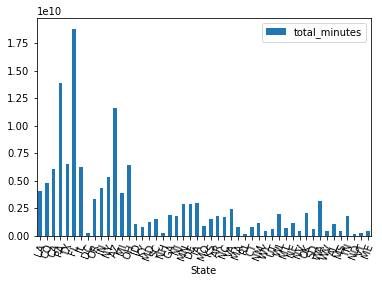

In [22]:
#checking data from the choropleth map to see how spread out the data are.
d2_short.plot.bar(x = 'State', y = 'total_minutes', rot = 70)

In [23]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(    
    geo_data = states, 
    data = d2_short,
    columns = ['State', 'avg_minutes'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "avg construction time").add_to(map2)
folium.LayerControl().add_to(map2)

map2

The choropleth map above shows the average amount of time per construction job in each state in minutes. 

<AxesSubplot:xlabel='State'>

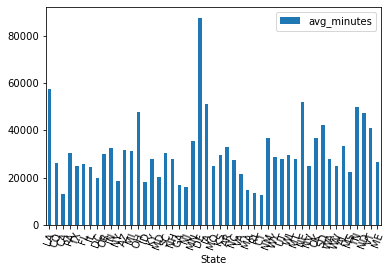

In [24]:
#create a bar chart to see distribution among states with average minutes variable
d2_short.plot.bar(x = 'State', y = 'avg_minutes', rot = 70)

In [25]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = states, 
    data = d1_plot,
    columns = ['State', 'const_total_minutes'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "construction time_full").add_to(map3)
folium.LayerControl().add_to(map3)

map3

The choropleth map above is using the time spent on construction data. I cannot tell what the map above is showing, which is why I made the maps above this one. This map is not representative of any of the measures that have been computed leading me to believe that this cell possibly "timed out" while processing due to the over 5 million records being processed.

In [26]:
#create a dataframe with only State and distance to weather station variables
d3 = df[['State', 'dist_to_weather(mi)']]

In [27]:
#create a column to get the average distance to weather
d3['avg_dist_to_weather(mi)'] = d3.groupby(['State'])['dist_to_weather(mi)'].transform(np.mean)

C:\Users\erhil\AppData\Local\Temp/ipykernel_2764/1687437642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['avg_dist_to_weather(mi)'] = d3.groupby(['State'])['dist_to_weather(mi)'].transform(np.mean)


In [28]:
#rename this dataframe to set up making it more concise with only 2 columns grouped by state
d3_short = d3[['State', 'avg_dist_to_weather(mi)']]

In [29]:
#create a df with only duplicates
df3_dups = d3_short[d3_short.duplicated()]

In [30]:
#create clean subset with aggregates grouped by state 
d3_short = d3_short.drop_duplicates()


In [31]:
#look at abbreviated data with only 2 columns, no duplicates, and grouped by state
d3_short

,State,avg_dist_to_weather(mi)
0,LA,8.679311
1,CO,10.298285
2,CA,8.977215
3,PA,9.696301
4,TX,9.549209
5,FL,5.770644
6,IL,7.432865
7,DC,3.848660
8,OR,17.320663
9,IN,10.147910


In [32]:
# Setup a folium map at a high-level zoom
map4 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = states, 
    data = d3_short,
    columns = ['State', 'avg_dist_to_weather(mi)'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "avg distance to station").add_to(map4)
folium.LayerControl().add_to(map4)

map4

This choropleth map shows the average distance to the weather station over all constructions per state. The blacked-out states (Alaska and Hawaii) have no construction data. States with lighter colors are where the average distance between the construction and weather station are closer and the darker states (South Dakota) show that the (average) distance from construction to weather station are farther.

In [33]:
df['State'].value_counts(dropna = False)

FL    734571
CA    462268
PA    456598
AZ    366921
NY    291389
TX    260289
IL    257479
CO    182534
IN    134942
OH    134653
MI    125286
VA    115361
OR    112449
GA    111589
WA    110988
NJ    108871
MN     81698
LA     69904
WI     65619
NC     63432
CT     62572
MD     61358
ID     58775
IA     57421
OK     56821
AR     54026
MA     51621
KS     50547
SC     48443
TN     35765
MO     35644
DE     32526
AL     31392
NM     30335
KY     29677
MT     23330
UT     23140
NE     21895
MS     17029
NV     16485
ME     16007
WV     15704
WY     14682
RI     14232
SD     13994
DC     13233
NH     10079
VT      6068
ND      4008
Name: State, dtype: int64

In [34]:
df[df.State == 'WA'].const_total_minutes.agg(['count', 'min', 'max', 'sum', 'mean'])

count    1.109880e+05
min      4.000000e+00
max      2.863880e+06
sum      3.117028e+09
mean     2.808437e+04
Name: const_total_minutes, dtype: float64